# Uncovering Stock Market Trends: A Statistical Exploration and Predictive Analysis

COMPSCI 216: Everything Data

Group Members (listed in the alphabetic order of the last name):
- Xin Jiang (xj56)
- Yunheng Wang (yw568)
- Ziyue Yin (zy166)
- Yitong Zhou (yz814)

# Code File 02: Sentiment Analysis Using News Headlines

In [1]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

stock_headlines_path = kagglehub.dataset_download('lykin22/stock-headlines')

print('Data source import complete.')

Data source import complete.


Firstly, we loading the dataset.

In [2]:
df = pd.read_csv("Stock Headlines.csv", encoding = 'ISO-8859-1')

We can have a general knowledge of how our labels are distributed. Obviously, as shown below, we have an overall balanced dataset.

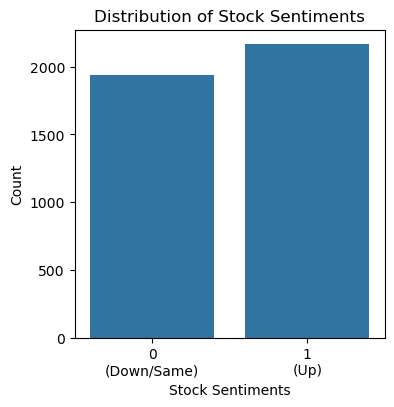

In [3]:
plt.figure(figsize=(4,4))
sns.countplot(x='Label', data=df)
plt.title('Distribution of Stock Sentiments')
plt.xlabel('Stock Sentiments')
plt.ylabel('Count')
plt.xticks([0, 1], ['0\n(Down/Same)', '1\n(Up)'])
plt.show()

Now, we try to process (and clean) the dataset by dropping `NaN` values.

In [4]:
df.dropna(inplace=True)
print(df.shape)

df_copy = df.copy()
df_copy.reset_index(inplace=True)

(4098, 27)


We then split the dataset into train an test set arbitrarily (based on time stamp).

In [5]:
train = df_copy[df_copy['Date'] < '20150101']
test = df_copy[df_copy['Date'] > '20141231']
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))

y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]

Train size: (3972, 28), Test size: (378, 28)


Here we are entering the second half of this code file. Firstly, we again import essential libraries for performing Natural Language Processing on given dataset

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yinziyue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Let's remove punctuation and special character from the text, rename the column, and convert the entire text to lower case. Then, we join all the columns.

In [7]:
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

new_columns = [str(i) for i in range(0,25)]
train.columns = new_columns
test.columns = new_columns

for i in new_columns:
    train[i] = train[i].str.lower()
    test[i] = test[i].str.lower()
    
train_headlines = []
test_headlines = []

for row in range(0, train.shape[0]):
    train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))

for row in range(0, test.shape[0]):
    test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [8]:
train_headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [9]:
test_headlines[0]

'most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles  diet or even inherited genes  new research suggests  random mutations that occur in dna when cells divide are responsible for two thirds of adult cancers across a wide range of tissues  iran dismissed united states efforts to fight islamic state as a ploy to advance u s  policies in the region   the reality is that the united states is not acting to eliminate daesh  they are not even interested in weakening daesh  they are only interested in managing it  poll  one in   germans would join anti muslim marches uk royal family s prince andrew named in us lawsuit over underage sex allegations some    asylum seekers refused to leave the bus when they arrived at their destination in rural northern sweden  demanding that they be taken back to malm or  some big city   pakistani boat blows self up after india navy chase  all four people on board the vessel from near the pakistani port city of karachi are bel

Now, let's create the corpus of train dataset.

In [10]:
ps = PorterStemmer()
train_corpus = []

for i in range(0, len(train_headlines)):
    # Tokenizing the news-title by words
    words = train_headlines[i].split()
    # Removing the stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]
    # Stemming the words
    words = [ps.stem(word) for word in words]
    # Joining the stemmed words
    headline = ' '.join(words)
    # Building a corpus of news-title
    train_corpus.append(headline)

And... the corpus of the test set!

In [11]:
test_corpus = []

for i in range(0, len(test_headlines)):
    # Tokenizing the news-title by words
    words = test_headlines[i].split()
    # Removing the stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]
    # Stemming the words
    words = [ps.stem(word) for word in words]
    # Joining the stemmed words
    headline = ' '.join(words)
    # Building a corpus of news-title
    test_corpus.append(headline)

In [12]:
train_corpus[0:10]

['hindranc oper extract leak report scorecard hugh instant hit buoy blue jack get skate ice cold alex chao maracana build unit deplet leicest prevail elliott spoil everton parti hungri spur sens rich pick gunner wide easi target derbi rais glass strupar debut doubl southgat strike leed pay penalti hammer hand robson youth lesson saint parti like wear wolv turn lamb stump mike catch testi gough taunt langer escap hit flintoff injuri pile woe england hunter threaten jospin new battl somm kohl successor drawn scandal differ men women sara denver nurs turn solicitor diana landmin crusad put tori panic yeltsin resign caught opposit flat foot russian roulett sold recov titl',
 'scorecard best lake scene leader german sleaz inquiri cheerio boyo main recommend cubi kill fee cubi kill fee cubi kill fee hopkin furiou foster lack hannib appetit cubi kill fee tale two tail say like like say elbow eye nippl task forc assess risk asteroid collis found last critic list time live dear doctor irish cou

In [13]:
test_corpus[0:10]

['case cancer result sheer bad luck rather unhealthi lifestyl diet even inherit gene new research suggest random mutat occur dna cell divid respons two third adult cancer across wide rang tissu iran dismiss unit state effort fight islam state ploy advanc u polici region realiti unit state act elimin daesh even interest weaken daesh interest manag poll one german would join anti muslim march uk royal famili princ andrew name us lawsuit underag sex alleg asylum seeker refus leav bu arriv destin rural northern sweden demand taken back malm big citi pakistani boat blow self india navi chase four peopl board vessel near pakistani port citi karachi believ kill dramat episod arabian sea new year eve accord india defenc ministri sweden hit third mosqu arson attack week car set alight french new year salari top ceo rose twice fast averag canadian sinc recess studi norway violat equal pay law judg say judg find consul employe unjustli paid less male counterpart imam want radic recruit muslim you

In [14]:
down_words = []
for i in list(y_train[y_train==0].index):
  down_words.append(train_corpus[i])

up_words = []
for i in list(y_train[y_train==1].index):
  up_words.append(train_corpus[i])

As an overview, we can create a wordcloud for `down_words`.

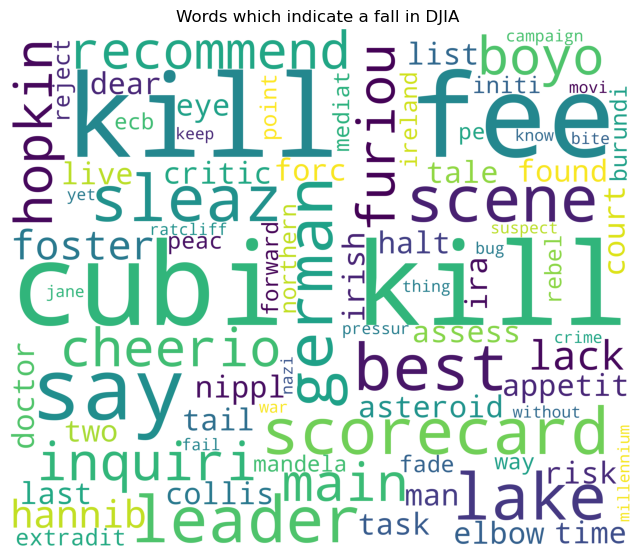

In [15]:
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

And... a wordcloud for `up_words`!

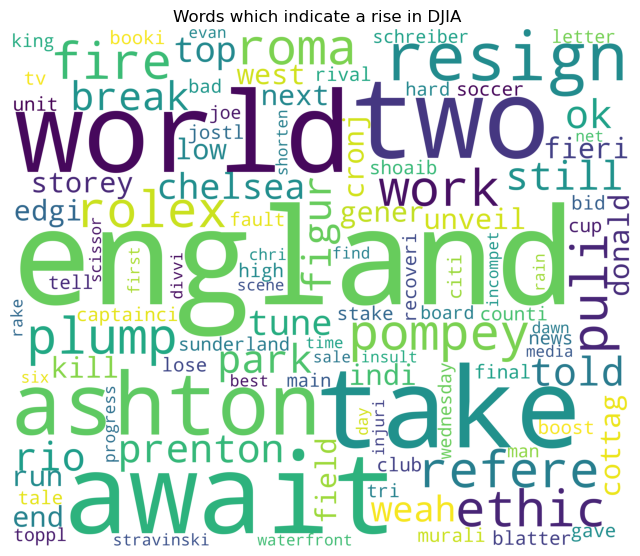

In [16]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise in DJIA ")
plt.show()

Now let's create the Bag of Words (BOW) model.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()

In [18]:
X_test = cv.transform(test_corpus).toarray()

Here, we officially create the three models:

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

Logistic Regression

In [20]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_y_pred = lr_classifier.predict(X_test)

In [21]:
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 85.98%
Precision score is: 0.87
Recall score is: 0.85


In [22]:
lr_cm = confusion_matrix(y_test, lr_y_pred)
lr_cm

array([[162,  24],
       [ 29, 163]])

Random Forest Classifier

In [23]:
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

In [24]:
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 84.13%
Precision score is: 0.83
Recall score is: 0.87


In [25]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm

array([[151,  35],
       [ 25, 167]])

Multinomial Naive Bayes

In [26]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)

In [27]:
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 83.86%
Precision score is: 0.85
Recall score is: 0.83


In [28]:
nb_cm = confusion_matrix(y_test, nb_y_pred)
nb_cm

array([[158,  28],
       [ 33, 159]])

In [29]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

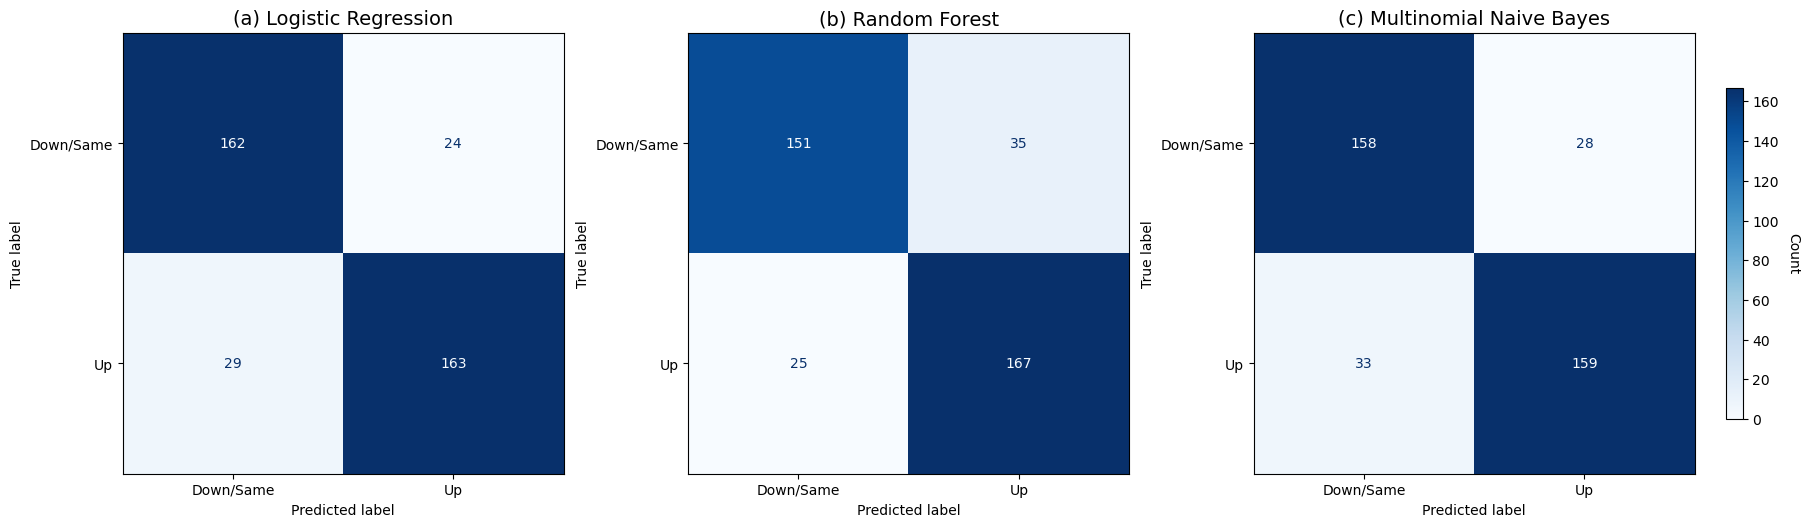

In [30]:
# ── 1.  Three confusion‑matrix arrays  ─────────────────────────────
cm_list = [lr_cm, rf_cm, nb_cm]     # replace with your variables
model_names = ['(a) Logistic Regression', '(b) Random Forest', '(c) Multinomial Naive Bayes']   # customise

# ── 2.  Figure & axes  ──────────────────────────────────────────────────
n = len(cm_list)
fig, axes = plt.subplots(1, n, figsize=(6*n, 5), constrained_layout=True)

# keep one colour scale for all subplots
vmax = max(cm.max() for cm in cm_list)
norm = mpl.colors.Normalize(vmin=0, vmax=vmax)
cmap = mpl.cm.Blues

# ── 3.  Plot each confusion matrix without its own colour bar ───────────
for cm, name, ax in zip(cm_list, model_names, axes):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['Down/Same', 'Up'])
    disp.plot(ax=ax,
            cmap=cmap,
            # norm=norm,          # enforce common scale
            colorbar=False,
            values_format='d')  # keep integers
    ax.set_title(name, fontsize=14)

# ── 4.  Add one shared colour bar ───────────────────────────────────────
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), shrink=0.75, pad=0.02)
cbar.set_label('Count', rotation=270, labelpad=15)

# fig.suptitle('Confusion Matrices for LR, RF, and MNB', fontsize=16, y=1.05)
plt.show()

Now we are able to make predictions!

In [31]:
import re
from random import randint

def stock_prediction(sample_news):
    sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
    sample_news = sample_news.lower()
    sample_news_words = sample_news.split()
    sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_news = [ps.stem(word) for word in sample_news_words]
    final_news = ' '.join(final_news)

    temp = cv.transform([final_news]).toarray()
    return lr_classifier.predict(temp)

sample_test = df_copy[df_copy['Date']>'20141231']
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [32]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
    print('Prediction: The stock price is likely to remain the same or go down.')
else:
    print('Prediction: The stock price is likely to go up!')

News: ISIS Twitter accounts have been hijacked with gay porn
Prediction: The stock price is likely to go up!
